In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('seaborn-darkgrid')

/var/folders/yv/ctk8_1p577g4j47lhrgl94580000gn/T/ipykernel_3500/2429791707.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [4]:
x=pd.read_csv('EWA.csv',index_col=0)['Close']
y=pd.read_csv('EWC.csv',index_col=0)['Close']
df =pd.concat([y,x],axis=1)
df.columns=['EWC','EWA']
df.index=pd.to_datetime(df.index,yearfirst=True)

# Find Hedge Ratio
When considering the hedge ratio in the context of a spread calculation, particularly when hedging with one asset against another, the hedge ratio can be seen as the relative quantity of the hedging instrument that will effectively minimize the risk or volatility of the spread between two assets.

In [8]:
import statsmodels.api as sm
#OLS(x,y)
model =sm.OLS(df.EWC.iloc[:90],df.EWA.iloc[:90])
model=model.fit()

'the hedge ratio is %2f'%model.params[0]


'the hedge ratio is 1.482147'

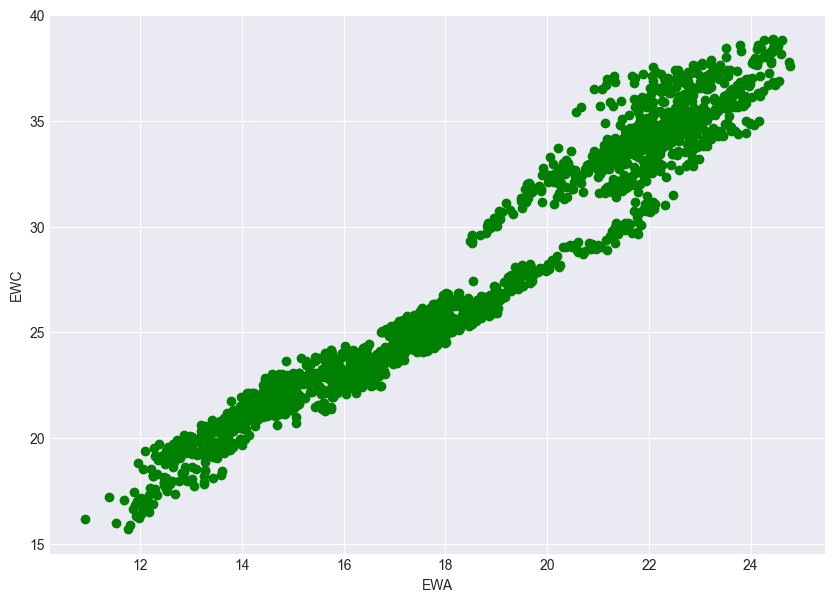

In [9]:
plt.figure(figsize=(10,7))
# scatter(X,Y)
plt.scatter(df.EWA,df.EWC, color='green')
plt.plot()
plt.xlabel('EWA')
plt.ylabel('EWC')
plt.show()

# Form the Spread

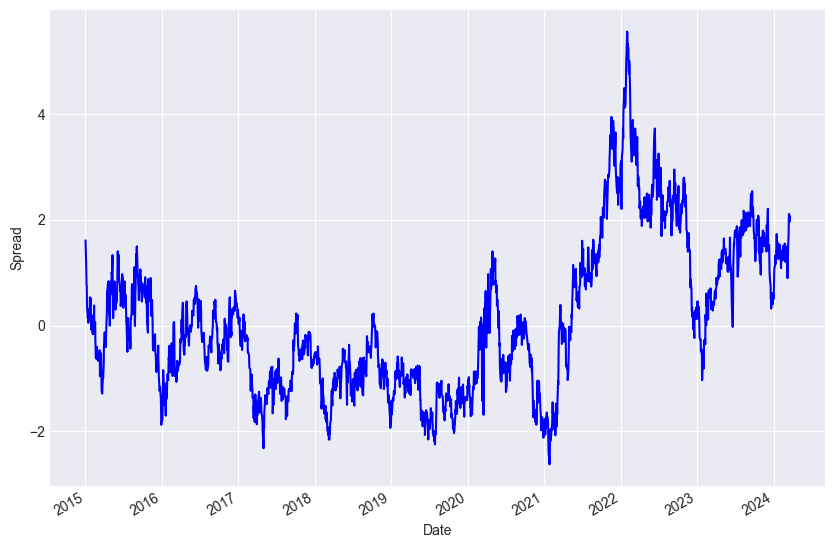

In [10]:
df['spread']=df.EWC-model.params[0]*df.EWA

# plot the spread
df.spread.plot(figsize=(10,7),color='blue')
plt.ylabel('Spread')
plt.show()

In [11]:
# To perform ADF Test
from statsmodels.tsa.stattools import adfuller
# Compute ADF test statistics
adf = adfuller(df.spread, maxlag = 1)
round(adf[0],2)

-2.9

In [15]:
#Check the critical values using adf[4] function
adf[4]

{'1%': -3.433175446486468,
 '5%': -2.8627882239194244,
 '10%': -2.5674344852583286}